In [2]:
from rubin_sim.scheduler.utils import Sky_area_generator
import healpy as hp
import numpy as np
from rubin_sim.data import get_data_dir
from astropy.coordinates import SkyCoord, ICRS, Galactic
from astropy import units as u

In [45]:
class gal_plane_pencilbeams_generator(Sky_area_generator):

    def add_gal_plane_pencilbeams(self, filter_ratios, radius=6.0,
                            label='gal_plane_pencilbeams',
                            field_selection=1):

        temp_map = np.zeros(hp.nside2npix(self.nside))

        # Load list of field centers of pencilbeam fields across the Galactic Plane.
        # Option 1 corresponds to 20 smaller fields
        # Option 2 corresponds to 4 larger fields
        pencilbeams_list = self.load_pencilbeam_fields(field_selection)

        # Generate the map regions from the pencilbeam pointings, using
        # the field radii given in degrees:
        for field in pencilbeams_list:
            pointing = SkyCoord(field['l_center'], field['b_center'], frame=Galactic, unit=(u.deg, u.deg))
            pointing = pointing.transform_to(ICRS)
            temp_map += self._set_circular_region(pointing.ra.deg, pointing.dec.deg, field['radius'])
            
        # Ensure designated pixels are not overriden:
        indx = np.where((temp_map > 0) & (self.pix_labels == ""))
        self.pix_labels[indx] = label
        for filtername in filter_ratios.keys():
            self.healmaps[filtername][indx] = filter_ratios[filtername]

    def load_pencilbeam_fields(self,field_selection):
        if field_selection == 1:
            pencilbeams_list = [
                {'name': 1, 'l_center': 280.0, 'b_center': 0.0, 'radius': 1.75},
                {'name': 2, 'l_center': 287.280701754386, 'b_center': 0.0, 'radius': 1.75},
                {'name': 3, 'l_center': 295.39473684210526, 'b_center':  -0.4166666666666661, 'radius': 1.75},
                {'name': 4, 'l_center': 306.42543859649123, 'b_center':  -0.4166666666666661, 'radius': 1.75},
                {'name': 5, 'l_center': 306.2061403508772, 'b_center':  -0.4166666666666661, 'radius': 1.75},
                {'name': 6, 'l_center': 320.1535087719298, 'b_center':  -0.4166666666666661, 'radius': 1.75},
                {'name': 7, 'l_center': 324.51754385964915, 'b_center':  -0.4166666666666661, 'radius': 1.75},
                {'name': 8, 'l_center': 341.38157894736844, 'b_center':  -0.4166666666666661, 'radius': 1.75},
                {'name': 9, 'l_center': 351.57894736842104, 'b_center':  -2.5, 'radius': 1.75},
                {'name': 10, 'l_center': 0.10964912280701888, 'b_center':  -2.083333333333333, 'radius': 1.75},
                {'name': 11, 'l_center': 0.3070175438596484, 'b_center':  -2.083333333333333, 'radius': 1.75},
                {'name': 12, 'l_center': 8.421052631578945, 'b_center':  -3.333333333333333, 'radius': 1.75},
                {'name': 13, 'l_center': 17.36842105263159, 'b_center':  -0.4166666666666661, 'radius': 1.75},
                {'name': 14, 'l_center': 26.31578947368422, 'b_center':  -2.9166666666666665, 'radius': 1.75},
                {'name': 15, 'l_center': 44.01315789473685, 'b_center':  -0.4166666666666661, 'radius': 1.75},
                {'name': 16, 'l_center': 44.21052631578948, 'b_center':  -0.4166666666666661, 'radius': 1.75},
                {'name': 17, 'l_center': 54.40789473684211, 'b_center':  0.0, 'radius': 1.75},
                {'name': 18, 'l_center': 66.27192982456141, 'b_center':  -0.4166666666666661, 'radius': 1.75},
                {'name': 19, 'l_center': 71.8859649122807, 'b_center':  0.0, 'radius': 1.75},
                {'name': 20, 'l_center': 80.0, 'b_center':  -5.0, 'radius': 1.75} ]

        else:
            pencilbeams_list = [
                {'name': 1, 'l_center': 306.56, 'b_center': -1.46, 'radius': 3.91},
                {'name': 2, 'l_center': 331.09, 'b_center': -2.42, 'radius': 3.91},
                {'name': 3, 'l_center': 18.51, 'b_center': -2.09, 'radius': 3.91},
                {'name': 4, 'l_center': 26.60, 'b_center': -2.15, 'radius': 3.91} ]

        return pencilbeams_list

    def return_maps(
        self,
        magellenic_clouds_ratios={"u": 0.32,"g": 0.4,"r": 1.0,"i": 1.0,"z": 0.9,"y": 0.9,},
        scp_ratios={"u": 0.1, "g": 0.1, "r": 0.1, "i": 0.1, "z": 0.1, "y": 0.1},
        nes_ratios={"g": 0.28, "r": 0.4, "i": 0.4, "z": 0.28},
        dusty_plane_ratios={"u": 0.1,"g": 0.28, "r": 0.28,"i": 0.28,"z": 0.28,"y": 0.1,},
        low_dust_ratios={"u": 0.32, "g": 0.4, "r": 1.0, "i": 1.0, "z": 0.9, "y": 0.9},
        bulge_ratios={"u": 0.18, "g": 1.0, "r": 1.05, "i": 1.05, "z": 1.0, "y": 0.23},
        virgo_ratios={"u": 0.32, "g": 0.4, "r": 1.0, "i": 1.0, "z": 0.9, "y": 0.9},

        pencilbeam_ratios = {"u": 0.18, "g": 1.0, "r": 1.05, "i": 1.05, "z": 1.0, "y": 0.23},
        ):

        # Array to hold the labels for each pixel
        self.pix_labels = np.zeros(hp.nside2npix(self.nside), dtype="U20")
        self.healmaps = np.zeros(
            hp.nside2npix(self.nside),
            dtype=list(zip(["u", "g", "r", "i", "z", "y"], [float] * 7)),
        )

        # Note, order here matters. Once a HEALpix is set and labled, subsequent add_ methods
        # will not override that pixel.
        self.add_gal_plane_pencilbeams(pencilbeam_ratios)

        self.add_magellanic_clouds(magellenic_clouds_ratios)
        self.add_lowdust_wfd(low_dust_ratios)
        self.add_virgo_cluster(virgo_ratios)
        self.add_bulge(bulge_ratios)
        self.add_nes(nes_ratios)
        self.add_dusty_plane(dusty_plane_ratios)
        self.add_scp(scp_ratios)

        return self.healmaps, self.pix_labels


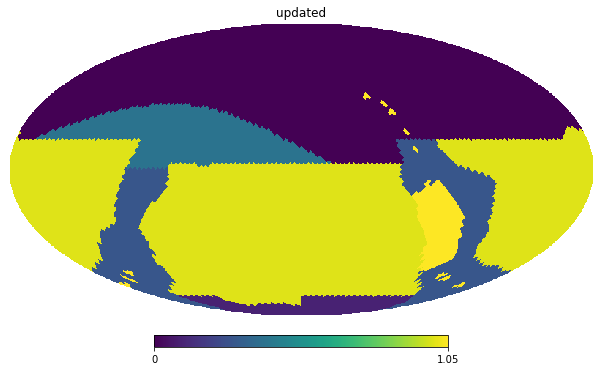

In [46]:
sag = gal_plane_pencilbeams_generator()
sky_maps, labels = sag.return_maps()
hp.mollview(sky_maps['r'], title='updated')

<Angle 10.00023594 deg>